# **Relación de la Encuesta Nacional de hogares**

La situación de las viviendas u hogares de la población peruana es de suma importancia para medir el impacto que tendría un fenómeno sísmico.

Elaborado por el Instituto Nacional de Estadística e Informática extraída desde el año 2004 hasta el 2022: https://www.gob.pe/institucion/inei/campa%C3%B1as/8600-encuesta-nacional-de-hogares-enaho-2023

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#importar librerias
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## **Dataset de Ubigeos**
Este dataset ayudará a identificar la Región, Provincia y Distrito de las viviendas encuestas en la base de datos del ENAHO

Extraído de la Plataforma Nacional de Datos Abiertos: https://www.datosabiertos.gob.pe/dataset/codigos-equivalentes-de-ubigeo-del-peru/resource/4a035ef3-8c50-4a4c-a11b-45a0777aedb3

In [8]:
filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/TB_UBIGEOS.csv"
df_ubigeo = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
df_ubigeo = df_ubigeo[["ubigeo_inei","region","provincia","distrito"]].copy()
df_ubigeo.head()

,ubigeo_inei,region,provincia,distrito
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS
3,10104,AMAZONAS,CHACHAPOYAS,CHETO
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN


In [9]:
# Información del tipo de datos
df_ubigeo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ubigeo_inei  1893 non-null   int64 
 1   region       1893 non-null   object
 2   provincia    1893 non-null   object
 3   distrito     1893 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.3+ KB


## **Base de Datos de ENAHO**

<p></p>
<p></p>

<table>
  <tr>
    <th>Nombre Variable</th>
    <th>Descripcion </th>
  </tr>
  <tr>
    <td>YEAR</td>
    <td>Año realizado la encuesta</td>
  </tr>
  <tr>
    <td>DOMINIO</td>
    <td>Dominio geográfico de la zona de la viviend: 1(Costa Norte), 2(Costa Centro), 3(Costa Sur), 4(Sierra Norte), 5(Sierra Centro), 6(Sierra Sur), 7(Selva), 8(Lima Metropolitana)</td>
  </tr>
  <tr>
    <td>Tipo_Vivienda</td>
    <td>1(Casa independiente), 2(Departamento en edificio), 3(Vivienda en quinta), 4(Vivienda en casa de vecindad), 5(Choza), 6(Vivienda improvisada), 7(Local no destinado para habitación humana)</td>
  </tr>
  <tr>
    <td>Pared_material</td>
    <td>Material predominante de las paredes: 1(ladrillo), 2(piedra, sillar), 3(adobe), 4(tapia), 5(Quincha: Caña con Barro), 6(Piedra con barro), 7(Madera), 8(Tripley), 9(Otro)</td>
  </tr>
  <tr>
    <td>Piso_material</td>
    <td>Material predominante de los pisos: 1(madera pulida), 2(láminas asfálticas), 3(losetas), 4(madera), 5(Cemento), 6(Tierra), 7(Otro)</td>
  </tr>
  <tr>
    <td>Techo_material</td>
    <td>Material predominante de los techos: 1(concreto armado), 2(madera), 3(tejas), 4(calamina), 5(Triplay), 6(Paja), 7(Otro)</td>
  </tr>
  <tr>
    <td>Licencia</td>
    <td>La vivienda cuenta con licencia de construcción: 1(Si), 2(No), 3(No sabe)</td>
  </tr>
  <tr>
    <td>Asistencia_tecnica</td>
    <td>Vivienda construida con asistencia técnica de Ing.Civil o arquitecto: 1(Si), 2(No), 3(No sabe)</td>
  </tr>
  <tr>
    <td>Nivel_propiedad_vivienda</td>
    <td>La vivienda hasta qué nivel es de su propiedad:1(alquilada), 2(propi, pago completo), 3(propia, invasión), 4(propia, a crédito), 5(cedida por trabajo), 6(cedida), 7(Otra) </td>
  </tr>
  <tr>
    <td>Titulo_propiedad</td>
    <td>Tiene título de propiedad: 1(Si), 2(No), 3(En trámite)</td>
  </tr>
  <tr>
    <td>Registro_SUNARP</td>
    <td>Vivienda registrada en la SUNARP: 1(Si), 2(No)</td>
  </tr>
  <tr>
    <td>Techo_material</td>
    <td>Material predominante de los techos: 1(concreto armado), 2(madera), 3(tejas), 4(calamina), 5(Triplay), 6(Paja), 7(Otro)</td>
  </tr>
  <tr>
    <td>NBI1</td>
    <td>Necedidad Básica Insatisfecha 1: Vivienda adecuada 0(Si), 1(No)</td>
  </tr>
  <tr>
    <td>NBI2</td>
    <td>Necedidad Básica Insatisfecha 2: Vivienda sin hacinamiento 0(Si), 1(No)</td>
  </tr>
  <tr>
    <td>NBI3</td>
    <td>Necedidad Básica Insatisfecha 3: Vivienda con SSHH 0(Si), 1(No)</td>
  </tr>
  <tr>
    <td>NBI4</td>
    <td>Necedidad Básica Insatisfecha 4: Vivienda con niños que asisten a la escuela 0(Si), 1(No)</td>
  </tr>
  <tr>
    <td>NBI5</td>
    <td>Necedidad Básica Insatisfecha 5: Vivienda sin dependencia económica 0(Si), 1(No)</td>
  </tr>

In [10]:
# Tamaño representativo de los dataset
filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-2012-100.csv"
df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
# -> Se escogió un año de Encuesta como muestra
print("Cantidad de registros aproximados por año: ",df.shape[0])
print("Cantidad de atributos aproximados por año: ",df.shape[1])

Cantidad de registros aproximados por año:  32546
Cantidad de atributos aproximados por año:  296


In [11]:
# Descarga de datos de 2018 a 2022
for i in range(2018,2023):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["AÑO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P104B1","P104B2","P105A","P106A","P106B","NBI1","NBI2","NBI3","NBI4","NBI5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="AÑO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  CONDICION = df["RESULT"]==1 #Se toma solo las encuestas que han sido COMPLETADAS
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Registro_SUNARP","Asistencia_Tecnica","Licencia","Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Registro_SUNARP_ ","Asistencia_Tecnica_ ","Licencia_ ","Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [12]:
# Descarga de datos de 2012 a 2018
for i in range(2012,2018):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["ï»¿AÃO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P104B1","P104B2","P105A","P106A","P106B","NBI1","NBI2","NBI3","NBI4","NBI5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="ï»¿AÃO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  CONDICION = df["RESULT"]==1 #Se toma solo las encuestas que han sido COMPLETADAS
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Registro_SUNARP","Asistencia_Tecnica","Licencia","Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Registro_SUNARP_ ","Asistencia_Tecnica_ ","Licencia_ ","Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [13]:
# Descarga de datos de 2011
for i in range(2011,2012):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["ï»¿AÃO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P105A","P106A","NBI1","NBI2","NBI3","NBI4","NBI5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="ï»¿AÃO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  #df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  #df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  #df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  CONDICION = df["RESULT"]==1
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [14]:
# Descarga de datos de 2010
for i in range(2010,2011):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["ï»¿AÃO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P105A","P106A","nbi1","nbi2","nbi3","nbi4","nbi5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="ï»¿AÃO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  #df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  #df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  #df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  df.rename(columns=lambda x:"NBI1" if x=="nbi1" else x, inplace=True)
  df.rename(columns=lambda x:"NBI2" if x=="nbi2" else x, inplace=True)
  df.rename(columns=lambda x:"NBI3" if x=="nbi3" else x, inplace=True)
  df.rename(columns=lambda x:"NBI4" if x=="nbi4" else x, inplace=True)
  df.rename(columns=lambda x:"NBI5" if x=="nbi5" else x, inplace=True)
  CONDICION = df["RESULT"]==1
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [15]:
# Descarga de datos de 2009
for i in range(2009,2010):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["AÃO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P105A","P106A","NBI1","NBI2","NBI3","NBI4","NBI5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="AÃO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  #df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  #df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  #df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  CONDICION = df["RESULT"]==1
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [16]:
# Descarga de datos de 2004 A 2008
for i in range(2004,2009):
  filename = "/content/drive/MyDrive/Hackathon Girls 💅/Databases/ENAHO/Enaho01-"+str(i)+"-100.csv"
  df = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
  df = df[["ï»¿AÃO","UBIGEO","DOMINIO","ESTRATO","RESULT","P101","P102","P103","P103A","P105A","P106A","NBI1","NBI2","NBI3","NBI4","NBI5"]]
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df.rename(columns=lambda x:"YEAR" if x=="ï»¿AÃO" else x, inplace=True)
  df.rename(columns=lambda x:"Tipo_Vivienda" if x=="P101" else x, inplace=True)
  df.rename(columns=lambda x:"Pared_material" if x=="P102" else x, inplace=True)
  df.rename(columns=lambda x:"Piso_material" if x=="P103" else x, inplace=True)
  df.rename(columns=lambda x:"Techo_material" if x=="P103A" else x, inplace=True)
  #df.rename(columns=lambda x:"Licencia" if x=="P104B1" else x, inplace=True)
  #df.rename(columns=lambda x:"Asistencia_Tecnica" if x=="P104B2" else x, inplace=True)
  df.rename(columns=lambda x:"Nivel_propiedad_vivienda" if x=="P105A" else x, inplace=True)
  df.rename(columns=lambda x:"Titulo_propiedad" if x=="P106A" else x, inplace=True)
  #df.rename(columns=lambda x:"Registro_SUNARP" if x=="P106B" else x, inplace=True)
  CONDICION = df["RESULT"]==1
  df_enaho_12_22 = df[CONDICION]
  df.drop(columns=["ubigeo_inei","RESULT"],inplace=True)

  # dummies
  df = pd.get_dummies(df,columns=["Tipo_Vivienda","Pared_material","Piso_material","Techo_material","Nivel_propiedad_vivienda","Titulo_propiedad"])
  df.drop(columns=["Tipo_Vivienda_ ","Pared_material_ ","Piso_material_ ","Techo_material_ ","Nivel_propiedad_vivienda_ ","Titulo_propiedad_ "],inplace=True)

  #GROUPBY
  df["cont"]=1
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  grupo1=df[["Key","YEAR","UBIGEO","DOMINIO","ESTRATO"]].groupby("Key").mean()
  df.drop(columns=["UBIGEO","DOMINIO","ESTRATO","YEAR"],inplace=True)
  grupo2=df.groupby("Key").sum()

  #Concatenación con la Base de Datos de Ubigeo
  df = pd.merge(grupo1, grupo2, how="inner", left_index=True, right_index=True)
  df = pd.merge(df, df_ubigeo, how="left", left_on=["UBIGEO"], right_on=["ubigeo_inei"])
  df["Key"]=df["region"]+df["provincia"]+df["distrito"]+str(i)
  df["ESTRATO"]=round(df["ESTRATO"],0)
  df["ESTRATO"]=df["ESTRATO"].astype(int)
  df["DOMINIO"]=df["DOMINIO"].astype(int)
  df["YEAR"]=df["YEAR"].astype(int)
  df["UBIGEO"]=df["UBIGEO"].astype(int)
  name = "Enaho_"+str(i)+".csv"
  df.to_csv(name,index=False)

In [17]:
# Carga de los datos descargados por año
filename = "/content/Enaho_2004.csv"
df_2004 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2005.csv"
df_2005 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2006.csv"
df_2006 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2007.csv"
df_2007 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2008.csv"
df_2008 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2009.csv"
df_2009 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2010.csv"
df_2010 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2011.csv"
df_2011 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2012.csv"
df_2012 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2013.csv"
df_2013 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2014.csv"
df_2014 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2015.csv"
df_2015 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2016.csv"
df_2016 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2017.csv"
df_2017 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2018.csv"
df_2018 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2019.csv"
df_2019 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2020.csv"
df_2020 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2021.csv"
df_2021 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')
filename = "/content/Enaho_2022.csv"
df_2022 = pd.read_csv(filename,sep=",",encoding='iso-8859-1')

In [18]:
# Concatenación de los DataBase del año 2012 al 2022
# -> SI Contienen las variables: Licencia, Asistencia_tecnica y Registro_SUNARP
df_enaho_p1_concat = pd.concat([df_2018,df_2021,df_2020,df_2019,df_2015,df_2017,df_2016,df_2022,df_2014,df_2013,df_2012],axis=0)
df_enaho_p1_concat.drop(columns=["Registro_SUNARP_9","Pared_material_9","Titulo_propiedad_9"],inplace=True)
df_enaho_p1_concat.rename(columns=lambda x:"Conteo_viviendas" if x=="cont" else x, inplace=True)
df_enaho_p1_concat.tail()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,region,provincia,distrito,Key
1027,2012,250105,7,2,60,15,18,141,3,20,...,0,75,73,1,206,250105,UCAYALI,CORONEL PORTILLO,YARINACOCHA,UCAYALICORONEL PORTILLOYARINACOCHA2012
1028,2012,250303,7,6,4,0,0,8,0,0,...,0,4,3,0,11,250303,UCAYALI,PADRE ABAD,CURIMANA,UCAYALIPADRE ABADCURIMANA2012
1029,2012,250302,7,6,8,4,1,33,0,2,...,0,12,30,1,60,250302,UCAYALI,PADRE ABAD,IRAZOLA,UCAYALIPADRE ABADIRAZOLA2012
1030,2012,250301,7,6,15,15,5,54,2,4,...,0,30,15,0,89,250301,UCAYALI,PADRE ABAD,PADRE ABAD,UCAYALIPADRE ABADPADRE ABAD2012
1031,2012,250401,7,6,0,1,0,14,2,0,...,0,1,12,0,19,250401,UCAYALI,PURUS,PURUS,UCAYALIPURUSPURUS2012


In [19]:
# Concatenación de los DataBase del año 2004 al 2012
# -> NO Contienen las variables: Licencia, Asistencia_tecnica y Registro_SUNARP
df_enaho_p2_concat = pd.concat([df_2007,df_2010,df_2009,df_2008,df_2011,df_2006,df_2005,df_2004],axis=0)
df_enaho_p2_concat.drop(columns=["Pared_material_9","Titulo_propiedad_9"],inplace=True)
df_enaho_p2_concat.rename(columns=lambda x:"Conteo_viviendas" if x=="cont" else x, inplace=True)
df_enaho_p2_concat.tail()

,YEAR,UBIGEO,DOMINIO,ESTRATO,Tipo_Vivienda_1,Tipo_Vivienda_2,Tipo_Vivienda_3,Tipo_Vivienda_4,Tipo_Vivienda_5,Tipo_Vivienda_6,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,region,provincia,distrito,Key
873,2004,250104,7,7,4,0,0,0,29,0,...,0,0,0,0,43,250104,UCAYALI,CORONEL PORTILLO,MASISEA,UCAYALICORONEL PORTILLOMASISEA2004
874,2004,250105,7,4,64,0,0,0,18,1,...,0,0,3,0,104,250105,UCAYALI,CORONEL PORTILLO,YARINACOCHA,UCAYALICORONEL PORTILLOYARINACOCHA2004
875,2004,250303,7,7,13,0,0,0,7,0,...,0,0,0,0,31,250303,UCAYALI,PADRE ABAD,CURIMANA,UCAYALIPADRE ABADCURIMANA2004
876,2004,250302,7,7,21,0,0,0,11,0,...,0,0,0,0,41,250302,UCAYALI,PADRE ABAD,IRAZOLA,UCAYALIPADRE ABADIRAZOLA2004
877,2004,250301,7,6,22,0,0,0,0,0,...,0,0,0,0,31,250301,UCAYALI,PADRE ABAD,PADRE ABAD,UCAYALIPADRE ABADPADRE ABAD2004


In [20]:
# Dimensión de la Base de Datos del 2012 - 2022
print("Total de combinación de los distritos por los 11 años de encuesta: ",df_enaho_p1_concat.shape[0])
print("Cantidad de variables extraídas (algunas en dummy) de la encuesta: ",df_enaho_p1_concat.shape[1])

Total de combinación de los distritos por los 11 años de encuesta:  13344
Cantidad de variables extraídas (algunas en dummy) de la encuesta:  59


In [21]:
# Dimensión de la Base de Datos del 2004 - 2011
print("Total de combinación de los distritos por los 8 años de encuesta: ",df_enaho_p2_concat.shape[0])
print("Cantidad de variables extraídas (algunas en dummy) de la encuesta: ",df_enaho_p1_concat.shape[1])

Total de combinación de los distritos por los 8 años de encuesta:  7450
Cantidad de variables extraídas (algunas en dummy) de la encuesta:  59


In [22]:
# Descarga de archivos
df_enaho_p1_concat.to_csv("df_ENAHO12-22.csv",index=False)
df_enaho_p2_concat.to_csv("df_ENAHO04-11.csv",index=False)

## **Análisis de gráficos**

In [23]:
df1 = df_enaho_p1_concat[(df_enaho_p1_concat["ESTRATO"]==1)|(df_enaho_p1_concat["ESTRATO"]==2)]
grupo1 = df1.groupby("region").sum()
grupo1["Asistencia%"]=round(grupo1["Asistencia_Tecnica_1"]/grupo1["Conteo_viviendas"]*100,2)
grupo1["SUNARP%"]=round(grupo1["Registro_SUNARP_1"]/grupo1["Conteo_viviendas"]*100,2)
grupo1["Pared%"]=round((grupo1["Pared_material_1"]+grupo1["Pared_material_2"])/grupo1["Conteo_viviendas"]*100,2)
grupo1["Techo%"]=round((grupo1["Techo_material_1"]+grupo1["Techo_material_2"])/grupo1["Conteo_viviendas"]*100,2)
grupo1

,YEAR,UBIGEO,DOMINIO,ESTRATO,Registro_SUNARP_1,Registro_SUNARP_2,Asistencia_Tecnica_1,Asistencia_Tecnica_2,Asistencia_Tecnica_3,Licencia_1,...,Nivel_propiedad_vivienda_7,Titulo_propiedad_1,Titulo_propiedad_2,Titulo_propiedad_3,Conteo_viviendas,ubigeo_inei,Asistencia%,SUNARP%,Pared%,Techo%
region,,,,,,,,,,,,,,,,,,,,,
ANCASH,64552,696044,67,64,2394,79,597,2947,222,1106,...,0,2473,612,66,5055,696044,11.81,47.36,65.50,45.64
AREQUIPA,286421,5695950,852,143,4457,191,2578,3418,1446,3065,...,17,4649,717,191,10719,5695950,24.05,41.58,72.20,61.98
AYACUCHO,88751,2204760,220,88,887,160,341,1708,396,749,...,0,1047,510,63,3543,2204760,9.62,25.04,44.54,41.32
CAJAMARCA,4029,120209,8,4,129,22,84,199,85,104,...,0,151,81,2,543,120209,15.47,23.76,43.28,35.36
CALLAO,145227,5047477,576,72,4869,403,2708,5268,1985,3269,...,15,5273,1422,264,14116,5047477,19.18,34.49,56.04,53.22
CUSCO,108914,4325663,324,108,1194,129,908,1397,447,1214,...,39,1323,365,110,4579,4325663,19.83,26.08,29.72,24.46
HUANUCO,22190,1101114,59,22,564,50,320,816,245,460,...,11,614,248,38,1828,1101114,17.51,30.85,43.87,42.45
ICA,129133,7052466,128,128,3877,176,2936,3233,617,3072,...,0,4053,1153,106,9069,7052466,32.37,42.75,66.91,57.61
JUNIN,58502,3483114,145,58,1272,351,1364,1660,629,1675,...,2,1623,522,124,4850,3483114,28.12,26.23,57.96,50.85


In [ ]:
# ordena los registros en orden descendente segun la columna Total
grupo1.sort_values(by='Conteo_viviendas',ascending=False, inplace=True)

# Obtiene los top 10 paises que mas inmigrantes aportan
df_top10 = grupo1.head(10)
df_top10.sort_values(by='Conteo_viviendas',ascending=True, inplace=True)

In [ ]:
# Importa algunas librerias base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Histogramas

1. Gráfico de Asistencia técnica

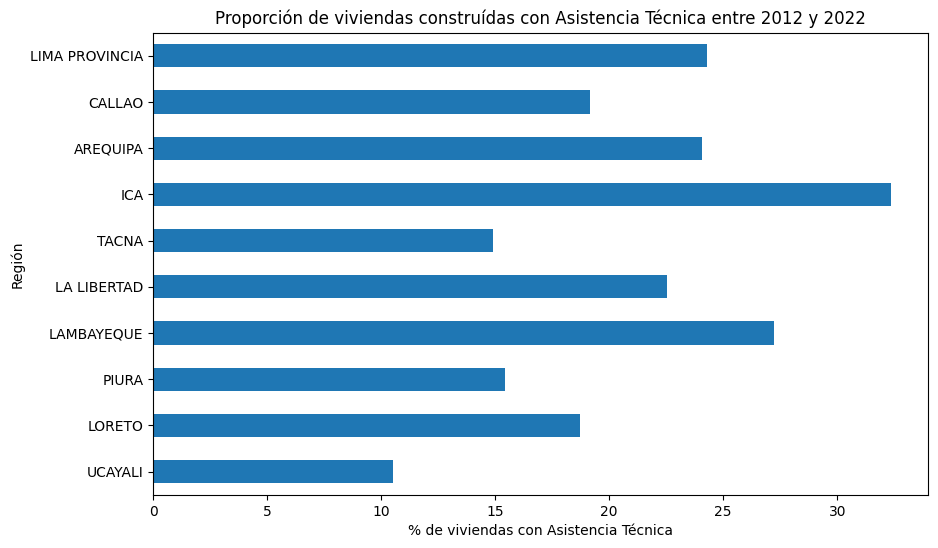

In [ ]:
# Data
df_asis = grupo1.sort_values(by='Conteo_viviendas',ascending=False, inplace=True).head(10)
df_asis = df_top10["Asistencia%"]
# Plotea el diagra de barras
df_asis.plot(kind='barh',rot=0, figsize=(10, 6),legend=False)
# Coloca etiquetas de ejes y titulo
plt.xlabel('% de viviendas con Asistencia Técnica')
plt.ylabel('Región')
plt.title('Proporción de viviendas construídas con Asistencia Técnica entre 2012 y 2022')
plt.show()  # muestra el plot

2.Gráfico de Viviendas registradas en la SUNARP

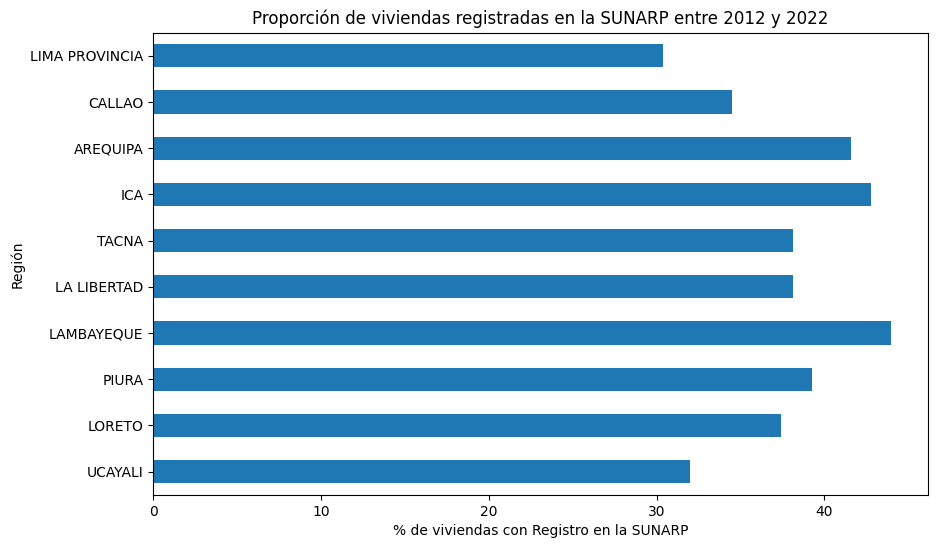

In [ ]:
# Data
df_sunarp = df_top10["SUNARP%"]
# Plotea el diagra de barras
df_sunarp.plot(kind='barh',rot=0, figsize=(10, 6),legend=False)
# Coloca etiquetas de ejes y titulo
plt.xlabel('% de viviendas con Registro en la SUNARP')
plt.ylabel('Región')
plt.title('Proporción de viviendas registradas en la SUNARP entre 2012 y 2022')
plt.show()  # muestra el plot

3. Gráfico de la calidad de las paredes de la vivienda

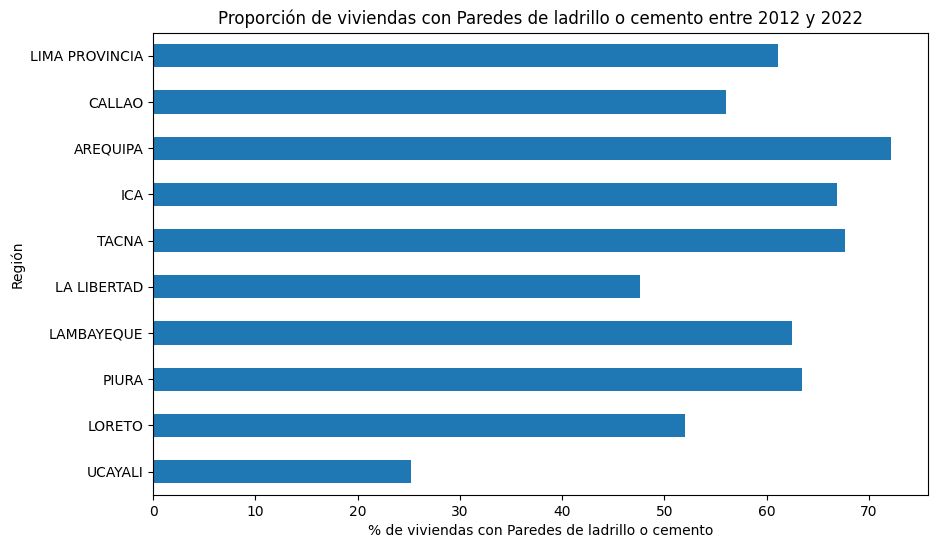

In [ ]:
# Data
df_pared = df_top10["Pared%"]
# Plotea el diagra de barras
df_pared.plot(kind='barh',rot=0, figsize=(10, 6),legend=False)
# Coloca etiquetas de ejes y titulo
plt.xlabel('% de viviendas con Paredes de ladrillo o cemento')
plt.ylabel('Región')
plt.title('Proporción de viviendas con Paredes de ladrillo o cemento entre 2012 y 2022')
plt.show()  # muestra el plot

4. Gráfico de la calidad de los Techos de las viviendas

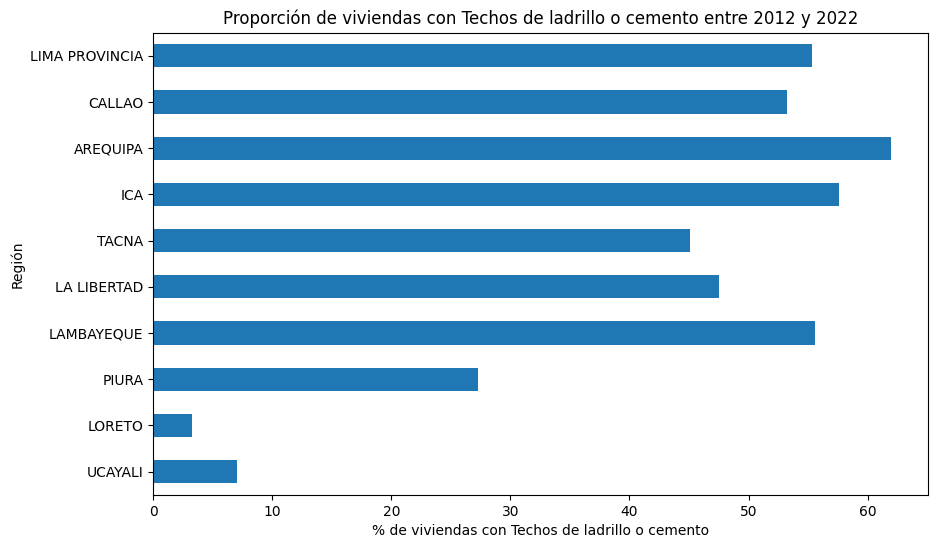

In [ ]:
# Data
df_techo = df_top10["Techo%"]
# Plotea el diagra de barras
df_techo.plot(kind='barh',rot=0, figsize=(10, 6),legend=False)
# Coloca etiquetas de ejes y titulo
plt.xlabel('% de viviendas con Techos de ladrillo o cemento')
plt.ylabel('Región')
plt.title('Proporción de viviendas con Techos de ladrillo o cemento entre 2012 y 2022')
plt.show()  # muestra el plot